# Team Homework 8: Bootstrapping and Confidence Intervals

Complete this problem set with your group (up to 4 students). You can either hand-write your work and submit a hard copy, or go to File -> Download as HTML to generate an HTML file, then either submit it online or as a hard copy. Each group only needs to submit one copy and will receive the same grade. 


In [2]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
from math import ceil

### Percentiles

Use the student data to identify the 20th, 40th, 60th, and 80th quartile of the height. Calculate your answers in two ways: once using the `percentile` function provided by the `datascience` package, and a second time by using the definition of percentiles. The position $L$ in a sorted list for the k-th percentile is given by: 

$L = \frac{k}{100} * n$

If L is not an integer, you can use the `ceil` function in the `math` package to round $L$ up to the next greater integer. 

In [3]:
students = Table.read_table('student_data.csv')
hgt = students.column('HEIGHT')
hgt.sort()


The `boxplot` shows some of the important percentiles from a given set of data. Run the following code to examine the boxplot of the student height data. How do your percentiles compare with these? 

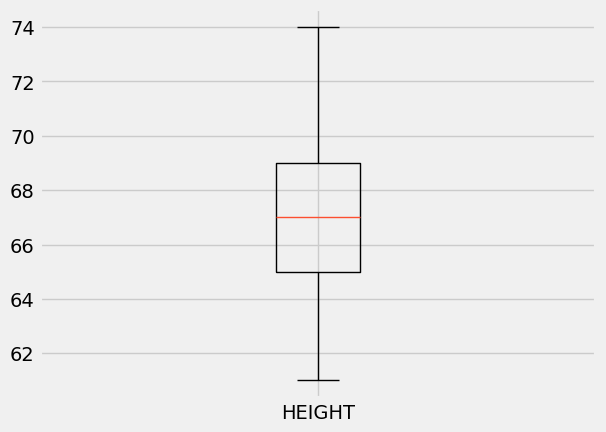

In [4]:
students.select('HEIGHT').boxplot()

### Bootstrapping

Prices of 10 textbooks are shown below. 

In [5]:
ten_books = make_array(35, 83, 102, 58, 91, 155, 205, 220, 120, 67, 99)

Find the sample mean. 

Use `sample` to create a bootstrap sample. Does your sample contain any repeated values? Is this a problem? 

Find the mean of this bootstrap sample. 

If we generate many means from all the bootstrap samples, where will this bootstrap distribution be centered?  

### Confidence Intervals from Previous Simulations

What percentage of Americans believe in global warming?  A survey on 2,251 randomly selected individuals conducted in October 2020 found that 1,328 answered Yes to the question “Is there solid evidence of global warming?”   A bootstrap distribution for this data is shown.  

<img src="bootstrap_proportion.png" width=600>

What does each value represent in this graph? 

Use the information in the graph to give and interpret a 95% CI for the proportion of Americans who believe there is solid evidence of global warming. (Note: you can use the closest values on the X-axis to approximate the middle 95% of the total area) 

A survey of 50 four-year colleges in the U.S. shows their tuition in 2020. Based on this sample, bootstrapping was used to resample from the 50 colleges and the distribution of the bootstrap sample means is shown below. 
<img src="bootstrap_mean.GIF" width=800>

Use this graph to derive the 95% confidence interval of the mean tuition cost in U.S. 4-year colleges. 

### Constructing a Confidence Interval 

The following code uses the student data to create a bootstrap confidence interval for the average age. 

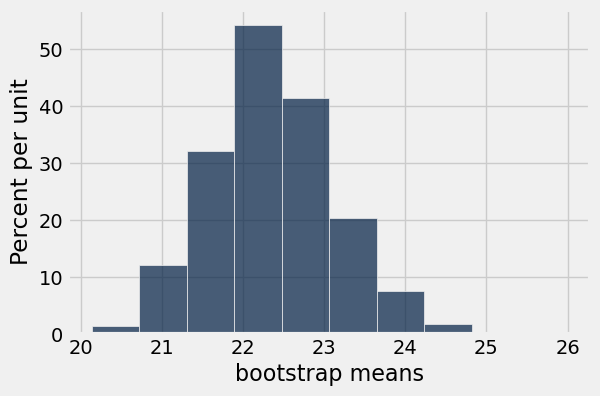

In [18]:
bootstrap_means = make_array()
for i in np.arange(5000):
    resampled_mean = np.average(students.sample().column('AGE'))
    bootstrap_means = np.append(bootstrap_means, resampled_mean)

Table().with_column('bootstrap means', bootstrap_means).hist()

Use the `bootstrap_means` array and `percentile` function to compute the 90%, 95% and 99% confidence intervals for the average age. 

In [21]:
percentile(2.5, bootstrap_means) - percentile(97.5, bootstrap_means)

-2.9594594594594597